In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

note to self: slides 21 & 22 in Linear Models Part 2 lecture

In [ ]:
data = load_breast_cancer() #this is binary data; dataset has two classes representing malignant and benign tumors
X = data.data
y = data.target
feature_names = data.feature_names

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #Use a 70%-30% split
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

rfe = RFE(lr, n_features_to_select=2) #"You must recursively eliminate features to find the best two features to perform the classification"
rfe = rfe.fit(X_train, y_train)

print('best 2 features:', rfe.support_)
print('feature ranking:', rfe.ranking_)
print('feature names:', feature_names)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

best 2 features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True False False False]
feature ranking: [ 4 16 29 28 15  9  7 11 12 20 23  2  8 17 26 19 22 24 21 25  3 13 14 27
 10  1  1  6  5 18]
feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
feature_indices = np.arange(len(feature_names)) # Create an array of indices corresponding to feature_names
feature_indices = feature_indices[rfe.support_] # Select indices based on RFE support

Text(0, 0.5, 'worst concavity')

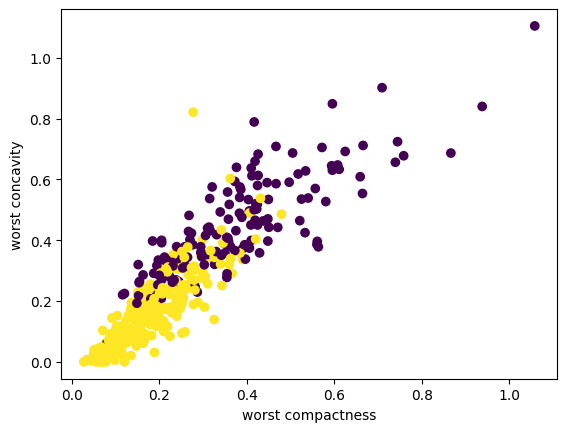

In [ ]:
plt.scatter(X_train[:,feature_indices[0]], X_train[:,feature_indices[1]], c =y_train)
plt.xlabel(data.feature_names[feature_indices[0]])
plt.ylabel(data.feature_names[feature_indices[1]])

In [ ]:
X_train_rfe = X_train[:, rfe.support_]
X_test_rfe = X_test[:, rfe.support_]

lr.fit(X_train_rfe, y_train)

y_pred = lr.predict(X_test_rfe)

lr.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Accuracy score: 0.8304093567251462
Confusion Matrix


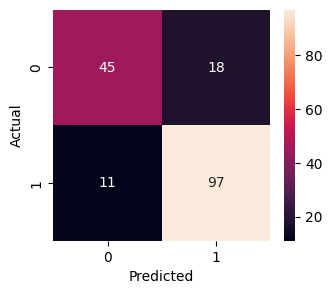

In [ ]:
# Evaluate the model using various classification metrics and report your findings

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

#print(cm)
plt.figure(figsize=(3.5,3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix")